In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import re

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_excel('./rotulação/TweetsPolitical01 OK OK.xlsx')
df2 = pd.read_excel('./rotulação/TweetsPolitical02 OK OK.xlsx')
df3 = pd.read_excel('./rotulação/TweetsPolitical03 OK OK.xlsx')
df4 = pd.read_excel('./rotulação/TweetsPolitical04 OK OK.xlsx')
df5 = pd.read_excel('./rotulação/TweetsPolitical05 OK OK.xlsx')
df6 = pd.read_excel('./rotulação/TweetsPolitical06 OK OK.xlsx')
df7 = pd.read_excel('./rotulação/TweetsPolitical07 OK OK.xlsx')
df8 = pd.read_excel('./rotulação/TweetsPolitical08 OK OK.xlsx')
df9 = pd.read_excel('./rotulação/TweetsPolitical09 OK OK.xlsx')
df10 = pd.read_excel('./rotulação/TweetsPolitical10 OK OK.xlsx')
df11 = pd.read_excel('./rotulação/TweetsPolitical11 OK OK.xlsx')
df12 = pd.read_excel('./rotulação/TweetsPolitical12 OK OK.xlsx')
df13 = pd.read_excel('./rotulação/TweetsPolitical13 OK OK.xlsx')
df14 = pd.read_excel('./rotulação/TweetsPolitical14 OK OK.xlsx')
df15 = pd.read_excel('./rotulação/TweetsPolitical15 OK OK.xlsx')

lista = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

df_all = pd.concat(lista)
df_all.shape

(12670, 2)

In [3]:
df_all.head()

,Tweet,Polaridade
0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0


In [4]:
df_all.isnull().sum()

Tweet         2
Polaridade    2
dtype: int64

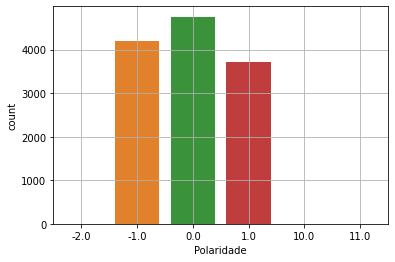

In [5]:
df_all = df_all.dropna()

sns.countplot(data=df_all, x='Polaridade')
plt.grid()

In [6]:
df_all = df_all.reset_index()
df_all

,index,Tweet,Polaridade
0,0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...,...
12663,78,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,79,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,80,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,81,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [7]:
df_all = df_all.drop(columns=['index'])
df_all.drop(df_all[df_all['Polaridade'] == 11].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == -2].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == 10].index, inplace=True)

df_all['Polaridade'].unique()

array([ 0.,  1., -1.])

In [8]:
Tweet = df_all['Tweet']
polarity = np.asarray(df_all['Polaridade'])

np.unique(polarity)

array([-1.,  0.,  1.])

In [9]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(12665, 24464)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

        -1.0       0.54      0.85      0.66      1224
         0.0       0.69      0.64      0.67      1422
         1.0       0.70      0.33      0.45      1154

    accuracy                           0.62      3800
   macro avg       0.64      0.61      0.59      3800
weighted avg       0.64      0.62      0.60      3800



In [11]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [12]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    return re.sub('@\w+','',frase)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [13]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)


In [47]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train

<8865x25943 sparse matrix of type '<class 'numpy.float64'>'
	with 78721 stored elements in Compressed Sparse Row format>

In [48]:
X_test

<3800x25943 sparse matrix of type '<class 'numpy.float64'>'
	with 33075 stored elements in Compressed Sparse Row format>

In [14]:
one = OneHotEncoder(sparse=False)

In [49]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [50]:
fit = model.fit(X_train.todense(), y_one, epochs=25, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/25
278/278 [==============================] - 3s 11ms/step - loss: 1.0208 - accuracy: 0.4858 - val_loss: 0.8872 - val_accuracy: 0.5950
Epoch 2/25
278/278 [==============================] - 3s 9ms/step - loss: 0.6639 - accuracy: 0.7446 - val_loss: 0.8543 - val_accuracy: 0.6261
Epoch 3/25
278/278 [==============================] - 2s 9ms/step - loss: 0.3162 - accuracy: 0.8981 - val_loss: 1.0395 - val_accuracy: 0.6176
Epoch 4/25
278/278 [==============================] - 2s 9ms/step - loss: 0.1622 - accuracy: 0.9543 - val_loss: 1.2079 - val_accuracy: 0.6155
Epoch 5/25
278/278 [==============================] - 2s 9ms/step - loss: 0.1072 - accuracy: 0.9699 - val_loss: 1.3915 - val_accuracy: 0.6105
Epoch 6/25
278/278 [==============================] - 3s 9ms/step - loss: 0.0737 - accuracy: 0.9821 - val_loss: 1.5257 - val_accuracy: 0.6100
Epoch 7/25
278/278 [==============================] - 2s 9ms/step - loss: 0.0536 - accuracy: 0.9859 - val_loss: 1.6626 - val_accuracy: 0.6068
Epoch

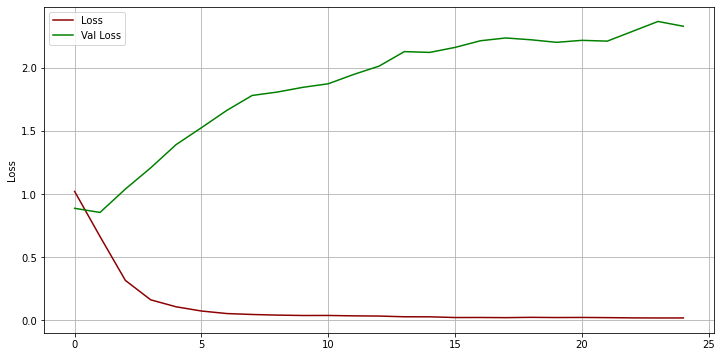

In [51]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

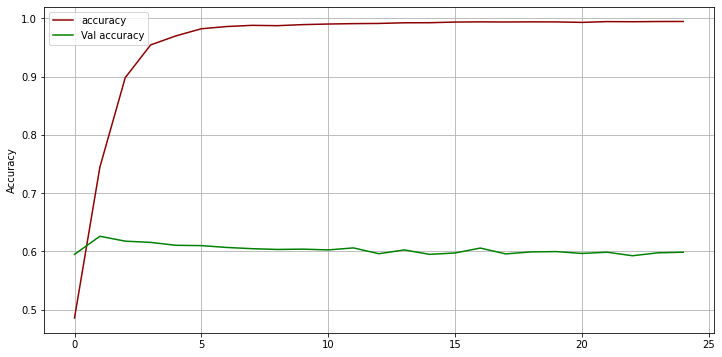

In [52]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [53]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 1s 5ms/step - loss: 2.3288 - accuracy: 0.5987


In [17]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df_all['Tweet'])))

vocab = set_array(df_all['Tweet'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [18]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    #tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    #tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [33]:
X_train.shape

(8865,)

In [20]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [21]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=20, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/20
70/70 [==============================] - 12s 178ms/step - loss: 1.0860 - accuracy: 0.4393 - val_loss: 1.0457 - val_accuracy: 0.5024
Epoch 2/20
70/70 [==============================] - 12s 165ms/step - loss: 0.9001 - accuracy: 0.6196 - val_loss: 0.9333 - val_accuracy: 0.5739
Epoch 3/20
70/70 [==============================] - 11s 156ms/step - loss: 0.6452 - accuracy: 0.7644 - val_loss: 1.0023 - val_accuracy: 0.5747
Epoch 4/20
70/70 [==============================] - 11s 158ms/step - loss: 0.4750 - accuracy: 0.8350 - val_loss: 1.1004 - val_accuracy: 0.5766
Epoch 5/20
70/70 [==============================] - 11s 158ms/step - loss: 0.3749 - accuracy: 0.8708 - val_loss: 1.1675 - val_accuracy: 0.5713
Epoch 6/20
70/70 [==============================] - 10s 142ms/step - loss: 0.3064 - accuracy: 0.8967 - val_loss: 1.2214 - val_accuracy: 0.5655
Epoch 7/20
70/70 [==============================] - 12s 166ms/step - loss: 0.2547 - accuracy: 0.9145 - val_loss: 1.3981 - val_accuracy: 0.5589

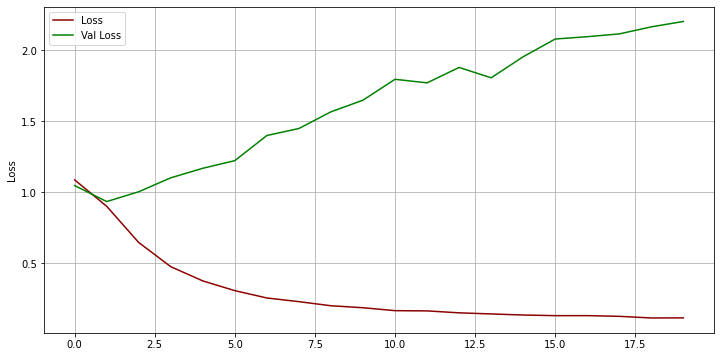

In [22]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

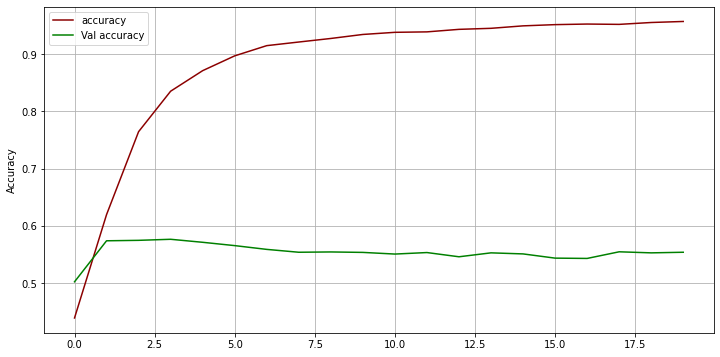

In [23]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [24]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 2s 17ms/step - loss: 2.2007 - accuracy: 0.5539 0s - loss: 2.2187 - accuracy: 


## BDR

In [25]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [26]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=10, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/10
70/70 [==============================] - 17s 243ms/step - loss: 1.0589 - accuracy: 0.4538 - val_loss: 0.9810 - val_accuracy: 0.5229
Epoch 2/10
70/70 [==============================] - 16s 223ms/step - loss: 0.8266 - accuracy: 0.6259 - val_loss: 0.9349 - val_accuracy: 0.5779
Epoch 3/10
70/70 [==============================] - 16s 226ms/step - loss: 0.5535 - accuracy: 0.7894 - val_loss: 1.0263 - val_accuracy: 0.5671
Epoch 4/10
70/70 [==============================] - 16s 231ms/step - loss: 0.3464 - accuracy: 0.8769 - val_loss: 1.2646 - val_accuracy: 0.5582
Epoch 5/10
70/70 [==============================] - 17s 236ms/step - loss: 0.2443 - accuracy: 0.9144 - val_loss: 1.3851 - val_accuracy: 0.5566
Epoch 6/10
70/70 [==============================] - 15s 220ms/step - loss: 0.1885 - accuracy: 0.9311 - val_loss: 1.5831 - val_accuracy: 0.5500
Epoch 7/10
70/70 [==============================] - 16s 235ms/step - loss: 0.1598 - accuracy: 0.9442 - val_loss: 1.6876 - val_accuracy: 0.5445

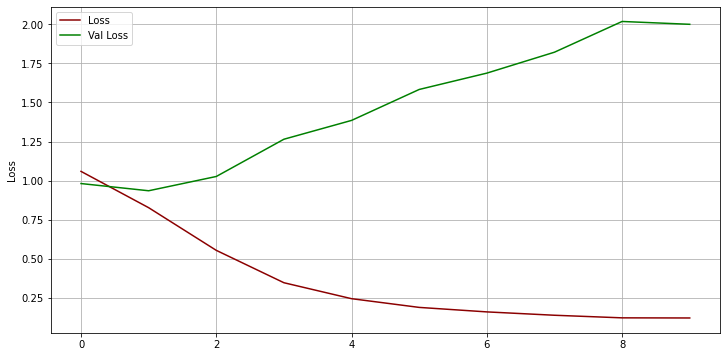

In [27]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

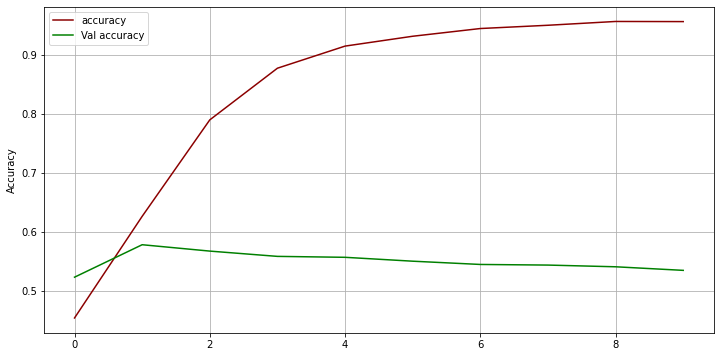

In [28]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## Conv 1D

In [29]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(32,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [30]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=15, batch_size=256 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/15
35/35 [==============================] - 2s 70ms/step - loss: 1.0926 - accuracy: 0.3693 - val_loss: 1.0818 - val_accuracy: 0.4216
Epoch 2/15
35/35 [==============================] - 2s 59ms/step - loss: 1.0624 - accuracy: 0.4439 - val_loss: 1.0329 - val_accuracy: 0.4918
Epoch 3/15
35/35 [==============================] - 2s 60ms/step - loss: 0.9752 - accuracy: 0.5454 - val_loss: 0.9795 - val_accuracy: 0.5316
Epoch 4/15
35/35 [==============================] - 2s 58ms/step - loss: 0.8540 - accuracy: 0.5997 - val_loss: 0.9532 - val_accuracy: 0.5384
Epoch 5/15
35/35 [==============================] - 2s 58ms/step - loss: 0.7055 - accuracy: 0.6726 - val_loss: 0.9878 - val_accuracy: 0.5413
Epoch 6/15
35/35 [==============================] - 2s 58ms/step - loss: 0.5624 - accuracy: 0.7814 - val_loss: 1.0688 - val_accuracy: 0.5332
Epoch 7/15
35/35 [==============================] - 2s 59ms/step - loss: 0.4451 - accuracy: 0.8404 - val_loss: 1.1622 - val_accuracy: 0.5397
Epoch 8/15
35

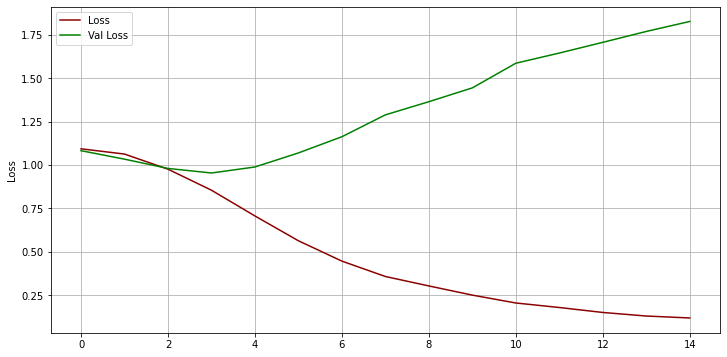

In [31]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

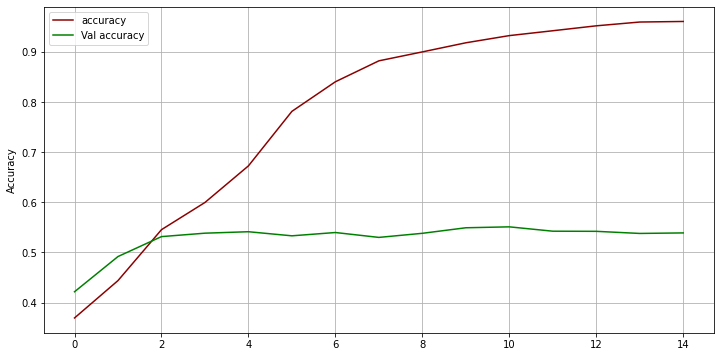

In [32]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()